### 해군 추진 장치 유지보수 데이터셋 정보  

#### 출처:  

* [Maintenance of Naval Propulsion Plants Data Set](https://www.kaggle.com/datasets/elikplim/maintenance-of-naval-propulsion-plants-data-set)
* [UCI 머신러닝 저장소 - 선박 추진 장치의 상태 기반 유지보수 데이터셋](http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants)
* [해군 추진 플랜트 데이터세트의 상태 기반 유지 관리](https://www.simonwenkel.com/2019/04/19/revisitingML-naval-propulsion.html)
  
Andrea Coraddu(2), Luca Oneto(1), Alessandro Ghio(1), Stefano Savio(2), Davide Anguita(3), Massimo Figari(2)  
1 - 스마트랩(Smartlab) - 비선형 복잡 시스템 연구소,  
DITEN - 제노바 대학교, 제노바 (I-16145), 이탈리아.  
2 - 해양 기술 연구팀,  
DITEN - 제노바 대학교, 제노바 (I-16145), 이탈리아.  
3 - 스마트랩(Smartlab) - 비선형 복잡 시스템 연구소,  
DIBRIS - 제노바 대학교, 제노바 (I-16145), 이탈리아.  
cbm '@' smartlab.ws  
www.cbm.smartlab.ws  

#### 데이터셋 정보:  
이 실험은 가스 터빈(GT) 추진 장치가 있는 해군 함정(프리깃)의 수치 시뮬레이터를 사용하여 수행되었습니다. 완전한 시뮬레이터를 구성하는 여러 블록(프로펠러, 선체, GT, 기어 박스, 컨트롤러)은 수년에 걸쳐 여러 유사한 실제 추진 장치에서 개발되고 정밀 조정되었습니다. 이러한 점을 고려했을 때, 사용 가능한 데이터는 실제 선박과 유사한 특성을 가지고 있습니다.  
이 시뮬레이터 버전에서는 GT 컴프레서와 터빈과 같은 GT 구성 요소의 성능 저하를 시간 경과에 따라 고려할 수도 있습니다.  
추진 시스템의 동작은 다음과 같은 매개변수로 설명됩니다:  

- 선박 속도 (레버 위치(lp)의 선형 함수)  
- 컴프레서 성능 저하 계수(kMc)  
- 터빈 성능 저하 계수(kMt)  

따라서 각 가능한 성능 저하 상태는 이 세 가지 매개변수(lp, kMt, kMc)의 조합으로 설명될 수 있습니다.  
컴프레서와 터빈의 성능 저하 범위는 0.001의 균일한 그리드로 샘플링되어 표현의 세밀도를 높였습니다.  
특히, 컴프레서 성능 저하 상태의 이산화는 kMc 계수를 [1; 0.95] 범위에서, 터빈 계수는 [1; 0.975] 범위에서 조사했습니다.  
선박 속도는 3노트에서 27노트까지의 가능한 속도 범위를 샘플링하여, 표현의 세밀도를 3노트로 설정했습니다.  
성능 저하에 영향을 받는 시스템의 상태를 간접적으로 나타내는 일련의 측정값(16개의 특성)이 매개변수 공간을 따라 데이터셋에 저장되었습니다.  

#### 속성 정보:  
물리 자산의 정상 상태에서 GT 측정값을 포함하는 16개의 특성 벡터:  

- 레버 위치 (lp) [ ]  
- 선박 속도 (v) [노트]  
- 가스터빈(GT) 축 토크 (GTT) [kN m]  
- GT 회전 속도 (GTn) [rpm]  
- 가스 발생기 회전 속도 (GGn) [rpm]  
- 우현 프로펠러 토크 (Ts) [kN]  
- 좌현 프로펠러 토크 (Tp) [kN]  
- 고압(HP) 터빈 출구 온도 (T48) [C]  
- GT 컴프레서 흡입 공기 온도 (T1) [C]  
- GT 컴프레서 배출 공기 온도 (T2) [C]  
- HP 터빈 출구 압력 (P48) [bar]  
- GT 컴프레서 흡입 공기 압력 (P1) [bar]  
- GT 컴프레서 배출 공기 압력 (P2) [bar]  
- GT 배기 가스 압력 (Pexh) [bar]  
- 터빈 분사 제어 (TIC) [%]  
- 연료 유량 (mf) [kg/s]  
- GT 컴프레서 성능 저하 상태 계수  
- GT 터빈 성능 저하 상태 계수  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [6]:
df = pd.read_csv("naval_propulsion.zip", sep='\s+', header=None)
# df.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque',
#                      'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure',
#                      'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']

columns = ['레버 위치', '선박 속도', '가스터빈 축 토크', '가스터빈 회전 속도', '가스 발생기 회전 속도', '우현 프로펠러 토크', '좌현 프로펠러 토크',
           '고압 터빈 온도', '가스터빈 컴프레서 흡입 온도', '가스터빈 컴프레서 배출 온도', '고압 터빈 압력', '가스터빈 컴프레서 흡입 압력', 
           '가스터빈 컴프레서 배출 압력', '가스터빈 배기 압력', '터빈 분사 제어', '연료 유량', '가스터빈 컴프레서 성능 저하', '가스터빈 터빈 성능 저하']

# Replace spaces with underscores in column names
new_columns = [col.replace(' ', '_') for col in columns]

df.columns = new_columns
df.shape

(11934, 18)

In [7]:
df.head()

,레버_위치,선박_속도,가스터빈_축_토크,가스터빈_회전_속도,가스_발생기_회전_속도,우현_프로펠러_토크,좌현_프로펠러_토크,고압_터빈_온도,가스터빈_컴프레서_흡입_온도,가스터빈_컴프레서_배출_온도,고압_터빈_압력,가스터빈_컴프레서_흡입_압력,가스터빈_컴프레서_배출_압력,가스터빈_배기_압력,터빈_분사_제어,연료_유량,가스터빈_컴프레서_성능_저하,가스터빈_터빈_성능_저하
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   레버_위치            11934 non-null  float64
 1   선박_속도            11934 non-null  float64
 2   가스터빈_축_토크        11934 non-null  float64
 3   가스터빈_회전_속도       11934 non-null  float64
 4   가스_발생기_회전_속도     11934 non-null  float64
 5   우현_프로펠러_토크       11934 non-null  float64
 6   좌현_프로펠러_토크       11934 non-null  float64
 7   고압_터빈_온도         11934 non-null  float64
 8   가스터빈_컴프레서_흡입_온도  11934 non-null  float64
 9   가스터빈_컴프레서_배출_온도  11934 non-null  float64
 10  고압_터빈_압력         11934 non-null  float64
 11  가스터빈_컴프레서_흡입_압력  11934 non-null  float64
 12  가스터빈_컴프레서_배출_압력  11934 non-null  float64
 13  가스터빈_배기_압력       11934 non-null  float64
 14  터빈_분사_제어         11934 non-null  float64
 15  연료_유량            11934 non-null  float64
 16  가스터빈_컴프레서_성능_저하  11934 non-null  float64
 17  가스터빈_터빈_성능_저

In [9]:
df.describe()

,레버_위치,선박_속도,가스터빈_축_토크,가스터빈_회전_속도,가스_발생기_회전_속도,우현_프로펠러_토크,좌현_프로펠러_토크,고압_터빈_온도,가스터빈_컴프레서_흡입_온도,가스터빈_컴프레서_배출_온도,고압_터빈_압력,가스터빈_컴프레서_흡입_압력,가스터빈_컴프레서_배출_압력,가스터빈_배기_압력,터빈_분사_제어,연료_유량,가스터빈_컴프레서_성능_저하,가스터빈_터빈_성능_저하
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/corazzon/codes/jupyter/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

Best Parameters found by Random Search: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Target: 가스터빈_컴프레서_성능_저하
Mean Squared Error: 1.395087038913844e-06
R^2 Score: 0.9935103843602214

Target: 가스터빈_터빈_성능_저하
Mean Squared Error: 8.262022241842697e-07
R^2 Score: 0.9855010811977246



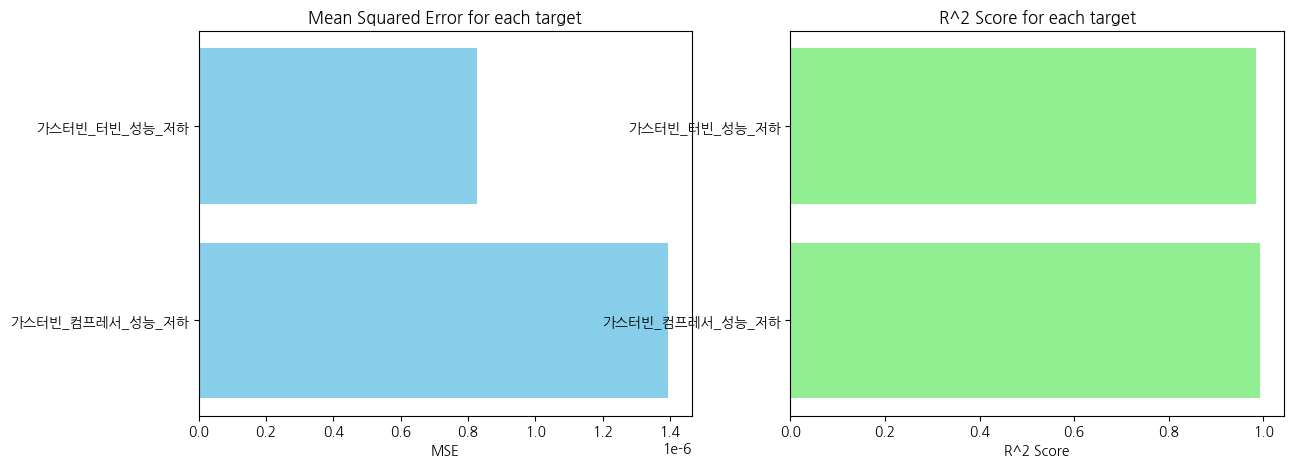

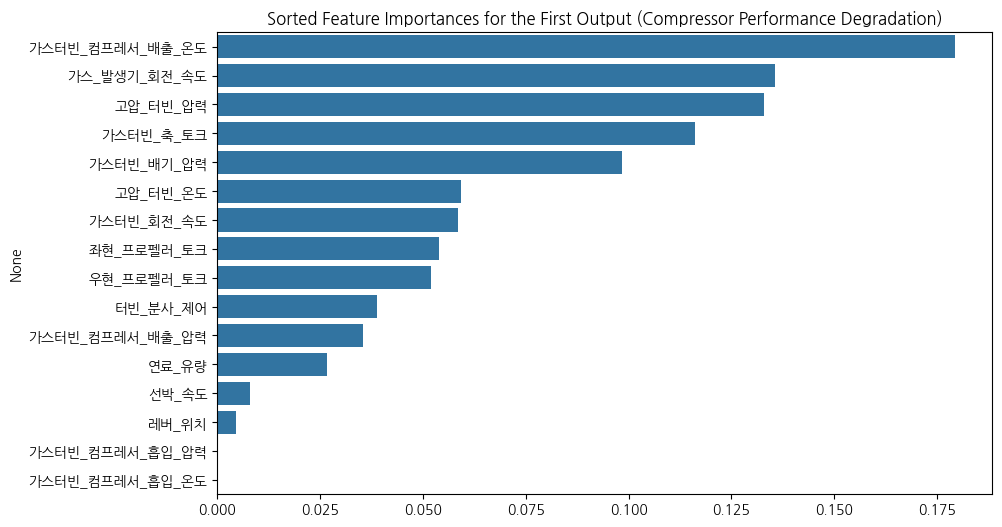

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_featur

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 피처와 타겟 변수 분리
X = df.drop(['가스터빈_컴프레서_성능_저하', '가스터빈_터빈_성능_저하'], axis=1)
y = df[['가스터빈_컴프레서_성능_저하', '가스터빈_터빈_성능_저하']]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 랜덤 서치 하이퍼파라미터 설정
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# 다중 출력 회귀 모델 생성
multi_output_model = MultiOutputRegressor(random_search)

# 모델 학습
multi_output_model.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters found by Random Search:", multi_output_model.estimators_[0].best_params_)

# 예측
y_pred = multi_output_model.predict(X_test)

# 성능 평가 및 시각화
mse_scores = []
r2_scores = []

for i, column in enumerate(y.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"Target: {column}")
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)
    print()

# MSE와 R^2 Score 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# MSE 시각화
ax[0].barh(y.columns, mse_scores, color='skyblue')
ax[0].set_title('Mean Squared Error for each target')
ax[0].set_xlabel('MSE')

# R^2 Score 시각화
ax[1].barh(y.columns, r2_scores, color='lightgreen')
ax[1].set_title('R^2 Score for each target')
ax[1].set_xlabel('R^2 Score')

plt.show()

# 변수 중요도 시각화 (Random Forest에서는 첫 번째 모델의 특성 중요도를 사용할 수 있음)
feature_importances = multi_output_model.estimators_[0].best_estimator_.feature_importances_
features = X.columns

# 피처 중요도를 높은 순서로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.title('Sorted Feature Importances for the First Output (Compressor Performance Degradation)')
plt.show()